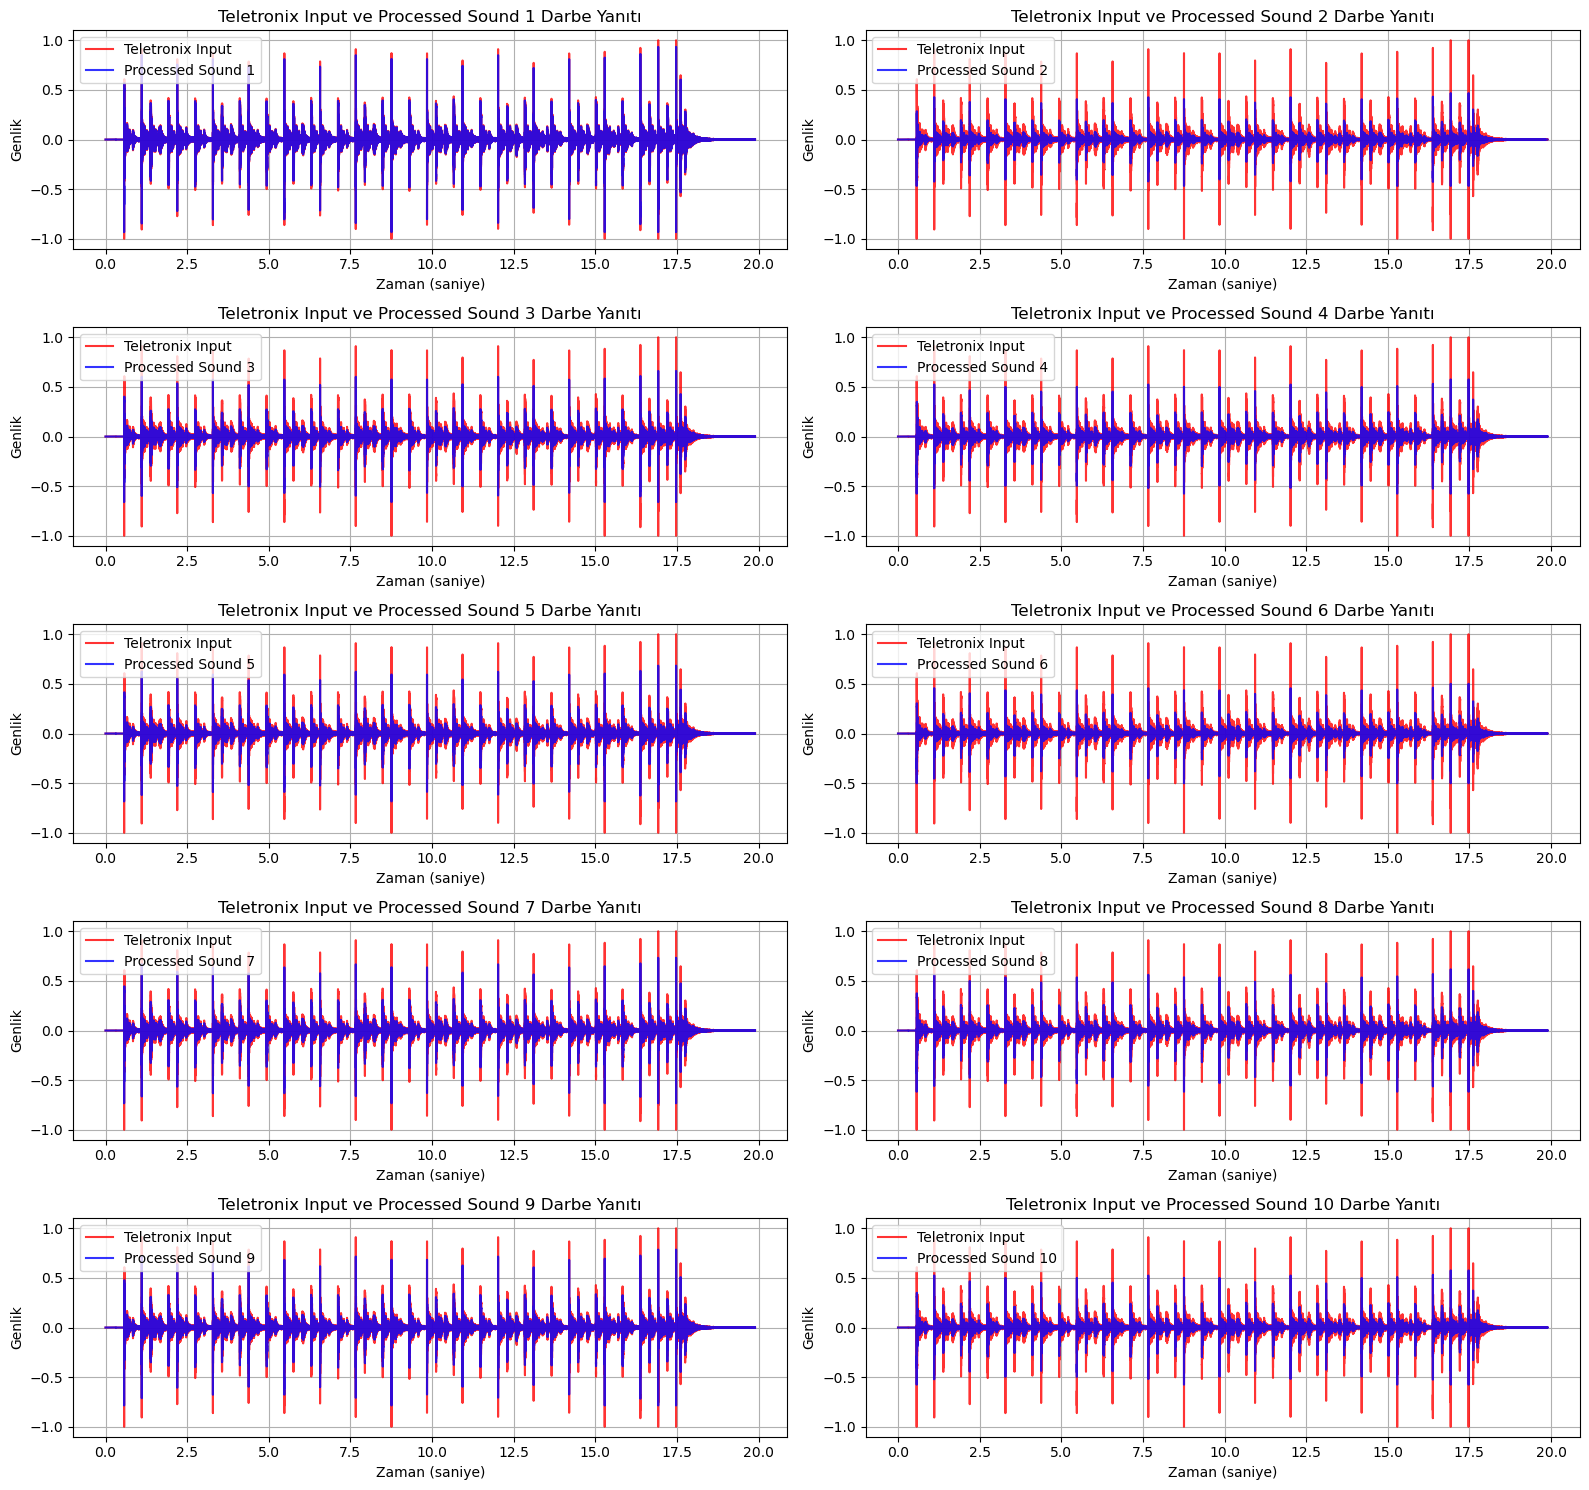

In [7]:
# Librosa sisteminin aktarılması

import matplotlib.pyplot as plt # Grafik ve görselleştirme işlemleri için Matplotlib kütüphanesini yükler.
import numpy as np # Bilimsel hesaplama ve dizi işlemleri için NumPy kütüphanesini yükler.
import librosa # Ses işleme ve analiz için Librosa kütüphanesini yükler.
import librosa.display # Librosa’nın ses grafikleri çizme fonksiyonlarını yükler.
import pyloudnorm as pyln  # LUFS analizini yapar.
import IPython.display as ipd # Ses dosyalarını Jupyter'da çalmak için gerekli IPython fonksiyonlarını yükler.
from IPython.display import Audio, display  # Ses dosyalarını Jupyter hücresinde oynatmaya olanak tanır.

# Ses dosyalarının yollarını bir listeye ekleme
audio_files = [
    "/Users/nazimerensahin/Desktop/fldr/teletro.wav", 
    "/Users/nazimerensahin/Desktop/fldr/22.wav",     
    "/Users/nazimerensahin/Desktop/fldr/33.wav",
    "/Users/nazimerensahin/Desktop/fldr/44.wav",
    "/Users/nazimerensahin/Desktop/fldr/55.wav",
    "/Users/nazimerensahin/Desktop/fldr/66.wav",
    "/Users/nazimerensahin/Desktop/fldr/77.wav",
    "/Users/nazimerensahin/Desktop/fldr/88.wav",
    "/Users/nazimerensahin/Desktop/fldr/99.wav",
    "/Users/nazimerensahin/Desktop/fldr/1010.wav",
    "/Users/nazimerensahin/Desktop/fldr/1111.wav",
]

# Her dosya için açıklayıcı isimler ekleme
audio_labels = [
    "Teletronix Input",
    "Processed Sound 1",
    "Processed Sound 2",
    "Processed Sound 3",
    "Processed Sound 4",
    "Processed Sound 5",
    "Processed Sound 6",
    "Processed Sound 7",
    "Processed Sound 8",
    "Processed Sound 9",
    "Processed Sound 10",
]

# Referans ses dosyasını yükleme
y1, sr1 = librosa.load(audio_files[0], sr=None)
time1 = np.linspace(0, len(y1) / sr1, len(y1))  # Referans dosyanın zaman ekseni

# Grafik düzenleme ayarları
num_files = len(audio_files) - 1  # İlk dosya hariç toplam karşılaştırılacak dosya sayısı
rows = (num_files + 1) // 2  # İkili sütun düzeni için satır sayısını belirleme

fig, axes = plt.subplots(rows, 2, figsize=(16, 3 * rows))  # İkili sütun düzeni
axes = axes.flatten()  # Grafiklere kolay erişim için düzleştirme

# İlk ses dosyasını diğer ses dosyaları ile karşılaştırma
for idx, file in enumerate(audio_files[1:], start=1):  # İlk dosya harici dosyalar
    y_other, sr_other = librosa.load(file, sr=None)
    time_other = np.linspace(0, len(y_other) / sr_other, len(y_other))  # Zaman ekseni

    # Grafik çizimi
    axes[idx - 1].plot(time1, y1, label=audio_labels[0], alpha=0.8, color="red")
    axes[idx - 1].plot(time_other, y_other, label=audio_labels[idx], alpha=0.8, color="blue")
    axes[idx - 1].set_title(f"{audio_labels[0]} ve {audio_labels[idx]} Darbe Yanıtı")
    axes[idx - 1].set_xlabel("Zaman (saniye)")
    axes[idx - 1].set_ylabel("Genlik")
    axes[idx - 1].legend()
    axes[idx - 1].grid()

# Kullanılmayan alt grafiklerin gizlenmesi (eğer dosya sayısı tek ise)
for idx in range(num_files, len(axes)):
    fig.delaxes(axes[idx])

# Tüm grafikleri sıkı yerleşimle gösterme
plt.tight_layout()
plt.show()